In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import statsmodels.api as sm1
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE



df_DataSet = pd.read_excel('https://github.com/eliasruizbone/Coder-DS/raw/main/DataSet/SuperTiendas/Supertiendas-RuizboneElias.xlsx', engine='openpyxl')


In [9]:
HTML('''
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
<script>
    code_shown = true;
    function code_toggle() {
        if (code_shown) {
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_shown = !code_shown;
    }
</script>
''')

In [10]:
nuevos_nombres = {
    'Row ID': 'ID',
    'Order ID': 'ID_Pedido',  
    'Order Date': 'Fecha_Pedido', 
    'Ship Date': 'Fecha_Envio', 
    'Ship Mode': 'Modo_Envio',
    'Customer ID': 'ID_Cliente',
    'Customer Name': 'Nombre_C',
    'Segment': 'Segmento_C',
    'Country': 'Pais_C',
    'City': 'Ciudad_C',
    'State': 'Estado_C',
    'Postal Code': 'Codigo_Postal',
    'Region': 'Region_C',
    'Product ID': 'ID_Producto',
    'Category': 'Categoria',
    'Sub-Category': 'SubCategoria',
    'Product Name': 'Producto',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad_Vendida',
    'Discount': 'Descuento',
    'Profit': 'Ganancia',
  
}

df_DataSet.rename(columns=nuevos_nombres,inplace=True)

In [11]:
HTML("""
<h1 style="text-align: center; color: #0073e6">Primera Entrega del Proyecto Final</h1>
""")

In [12]:
HTML("""
<h1 style="text-align: center; color: #0073e6">Análisis Exploratorio de Datos</h1>
""")

# Análisis de Rentabilidad en el Conjunto de Datos "Superstore"

En esta segunda parte de mi proyecto de Análisis Exploratorio de Datos (EDA), me centraré en el conjunto de datos "Superstore" con un enfoque en la variable objetivo: la ganancia. El objetivo principal es optimizar la rentabilidad de nuestro negocio.

## Pasos para Alcanzar el Objetivo:

### 1. Exploración de las Ganancias

- Exploraré las ganancias desglosadas por productos, categorías de productos, segmentos de clientes, ubicaciones geográficas, modo de envios y otros atributos relevantes en el conjunto de datos.

### 2. Identificación de Productos Rentables

- Identificaré los productos o categorías que generan las ganancias más altas y evaluaré si existen productos menos rentables.

### 3. Análisis del Margen de Ganancias

- Analizaré el margen de ganancias de cada producto o categoría para determinar su contribución a la rentabilidad general.

### 4. Impacto de los Descuentos

- Analizaré cómo las estrategias de precios y descuentos han afectado las ganancias. ¿Los descuentos han aumentado o disminuido las ganancias?

### 5. Segmentación de Clientes

- Clasificaré a los clientes en grupos en función de sus compras y su contribución a las ganancias.

Estos pasos me permitirán realizar un análisis completo de las ganancias en el conjunto de datos "Superstore" y tomar decisiones informadas para optimizar la rentabilidad de nuestro negocio.


**Contexto Empresarial:**

Nos ubicamos en el mundo del comercio minorista en una cadena de tiendas llamada "Superstore." Esta cadena tiene presencia en diversas ubicaciones a nivel nacional y se dedica a la venta de una amplia gama de productos, desde dispositivos electrónicos hasta artículos para el hogar y suministros de oficina. La empresa "Superstore" busca mejorar su rentabilidad y eficiencia operativa mediante un análisis de datos exhaustivo.

**Problema Empresarial:**

El desafío que enfrenta "Superstore" es optimizar sus ganancias en un mercado altamente competitivo. La empresa busca identificar oportunidades para aumentar su rentabilidad al comprender mejor las dinámicas de ventas, los márgenes de ganancias, los costos operativos y el comportamiento de sus clientes. Además, se busca identificar productos o categorías que contribuyen significativamente a las ganancias y áreas donde se pueden reducir costos sin afectar la calidad. "Superstore" también busca retener a sus clientes más valiosos y anticipar oportunidades de crecimiento a lo largo del tiempo.

**Contexto Analítico:**

Para abordar esta problemática, se aplicará un enfoque analítico basado en datos. Se utilizarán técnicas de análisis de datos y modelado predictivo para explorar el conjunto de datos de ventas de "Superstore". El análisis se enfocará en obtener insights sobre las ganancias y cómo se ven afectadas por diversos factores, como productos, categorías, precios, costos y comportamiento del cliente. Se aplicarán herramientas de visualización y estadísticas descriptivas para identificar patrones y tendencias en los datos. Además, se utilizarán análisis de series temporales para comprender las variaciones estacionales. El objetivo es proporcionar recomendaciones basadas en datos que permitan a "Superstore" tomar decisiones informadas para optimizar su rentabilidad.

In [126]:
ganancia_total = df_DataSet['Ganancia'].sum()
df_GananciaNegativa = df_DataSet[df_DataSet['Ganancia']<0]
df_GananciaPositiva = df_DataSet[df_DataSet['Ganancia']>0]


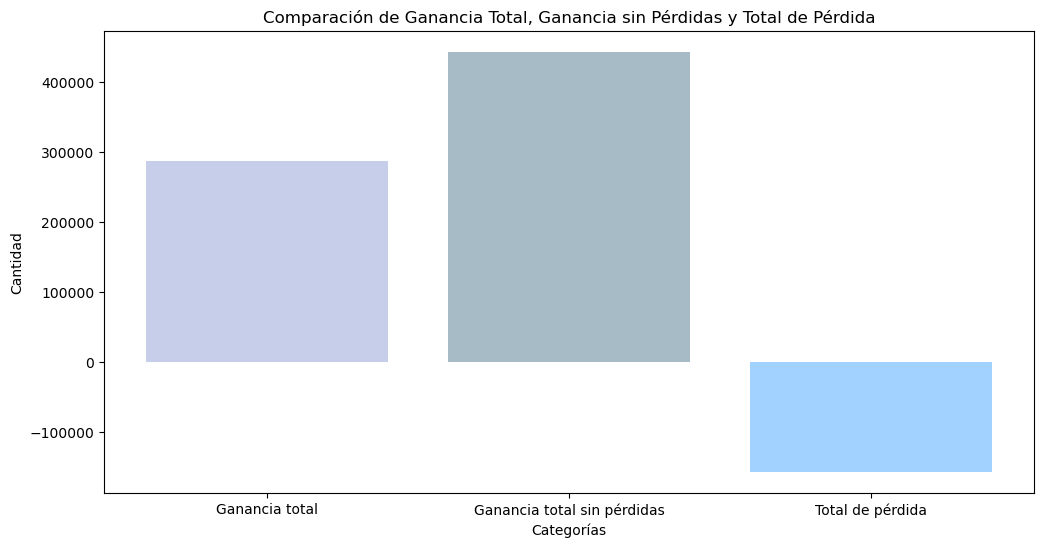

In [131]:
ganancia_total_negativa = df_DataSet[df_DataSet['Ganancia'] < 0]['Ganancia'].sum()
ganancia_total_positiva = df_DataSet[df_DataSet['Ganancia'] > 0]['Ganancia'].sum()
PerdidaTotal=np.negative(df_GananciaNegativa['Ganancia'].sum())

valores = [ganancia_total,ganancia_total_positiva, ganancia_total_negativa]
nombres = ['Ganancia total', 'Ganancia total sin pérdidas', 'Total de pérdida']

plt.figure(figsize=(12, 6))
plt.bar(nombres, valores, color=['#C7CEEA', '#A7BBC7', '#A2D2FF'])

plt.title('Comparación de Ganancia Total, Ganancia sin Pérdidas y Total de Pérdida')
plt.ylabel('Cantidad')
plt.xlabel('Categorías')

plt.show()


In [132]:
# Ganancia total por categoria, subcategoria (+ y -)
df_GT = pd.pivot_table(data=df_DataSet[['Categoria', 'SubCategoria', 'Ganancia']],
                      index=['Categoria', 'SubCategoria'],
                      values='Ganancia',
                      aggfunc='sum')

df_GT['%_SubCategoria'] = (df_GT['Ganancia'] / ganancia_total) * 100
df_GT['%_SubCategoria'] = df_GT['%_SubCategoria'].apply(lambda x: round(x, 2))

porcentaje_categoria_categoria = df_GT.groupby('Categoria')['%_SubCategoria'].transform('sum')
df_GT['%_Categoria'] = porcentaje_categoria_categoria
df_GT




Ganancia  %_SubCategoria  %_Categoria
Categoria       SubCategoria                                       
Furniture       Bookcases     -3472.56           -1.21         6.44
                Chairs        26590.17            9.28         6.44
                Furnishings   13059.14            4.56         6.44
                Tables       -17725.48           -6.19         6.44
Office Supplies Appliances    18138.01            6.33        42.76
                Art            6527.79            2.28        42.76
                Binders       30221.76           10.55        42.76
                Envelopes      6964.18            2.43        42.76
                Fasteners       949.52            0.33        42.76
                Labels         5546.25            1.94        42.76
                Paper         34053.57           11.89        42.76
                Storage       21278.83            7.43        42.76
                Supplies      -1189.10           -0.42        42.76
Technology      Accessories   41936.64           14.64        50.78
                Copiers       55617.82           19.42        50.78
                Machines       3384.76            1.18        50.78
                Phones        44515.73           15.54        50.78

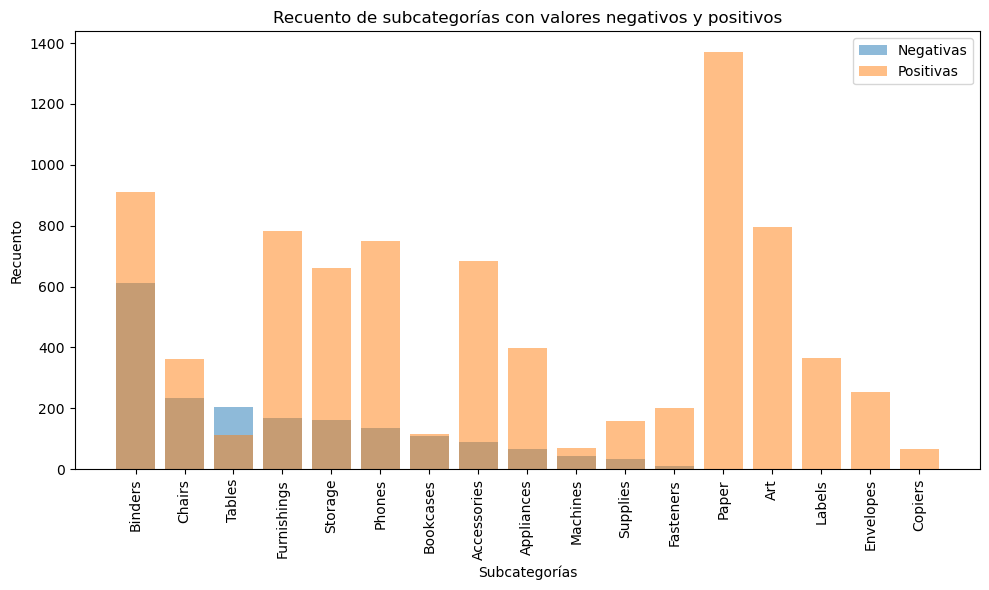

In [70]:
G_negativas = df_GananciaNegativa['SubCategoria'].value_counts()
G_positivas = df_GananciaPositiva['SubCategoria'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts_negativas.index, G_negativas, alpha=0.5, label='Negativas')
plt.bar(counts_positivas.index, G_positivas, alpha=0.5, label='Positivas')

plt.xlabel('Subcategorías')
plt.ylabel('Recuento')
plt.title('Recuento de subcategorías con valores negativos y positivos')
plt.xticks(rotation=90) 
plt.legend()
plt.tight_layout()

plt.show()

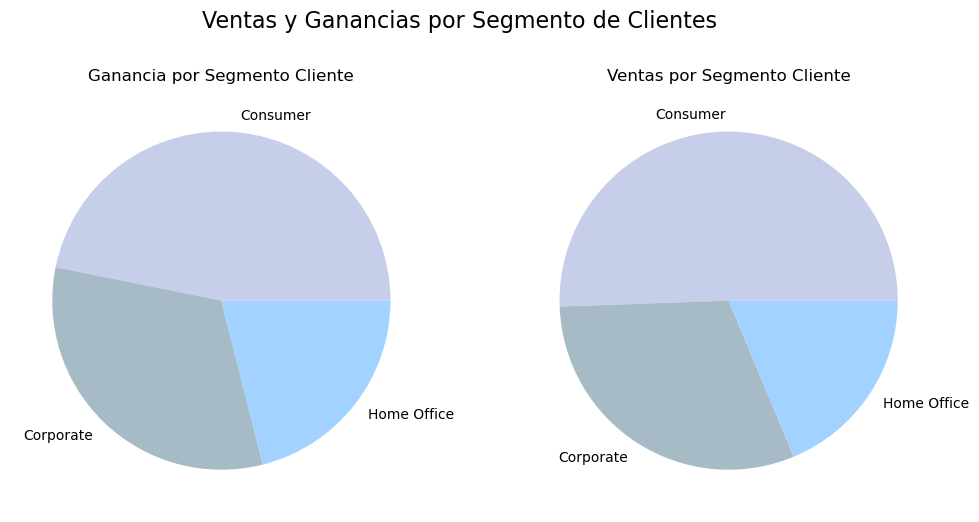

In [136]:
df_ganancia_segmento = df_DataSet[['Segmento_C','Ventas','Ganancia']]
df_ganancia_segmento = df_ganancia_segmento.groupby(['Segmento_C']).sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(df_ganancia_segmento['Ganancia'], labels=df_ganancia_segmento['Segmento_C'], colors=['#C7CEEA', '#A7BBC7', '#A2D2FF'])
axs[0].set_title("Ganancia por Segmento Cliente")

axs[1].pie(df_ganancia_segmento['Ventas'], labels=df_ganancia_segmento['Segmento_C'], colors=['#C7CEEA', '#A7BBC7', '#A2D2FF'])
axs[1].set_title("Ventas por Segmento Cliente")

fig.suptitle('Ventas y Ganancias por Segmento de Clientes', fontsize=16)

plt.show()

In [112]:
resumen_segmento_C = df_DataSet.groupby('Segmento_C')[['Ventas', 'Ganancia']].sum()

resumen_segmento_C['% de Venta'] = (resumen_segmento_C['Ventas'] / resumen_segmento_C['Ventas'].sum()) * 100
resumen_segmento_C['% de Ganancia'] = (resumen_segmento_C['Ganancia'] / resumen_segmento_C['Ganancia'].sum()) * 100



pd.options.display.float_format = '{:.2f}'.format
print(resumen_segmento_C)


                Ventas  Ganancia  % de Venta  % de Ganancia
Segmento_C                                                 
Consumer    1161401.34 134119.21       50.56          46.83
Corporate    706146.37  91979.13       30.74          32.12
Home Office  429653.15  60298.68       18.70          21.05


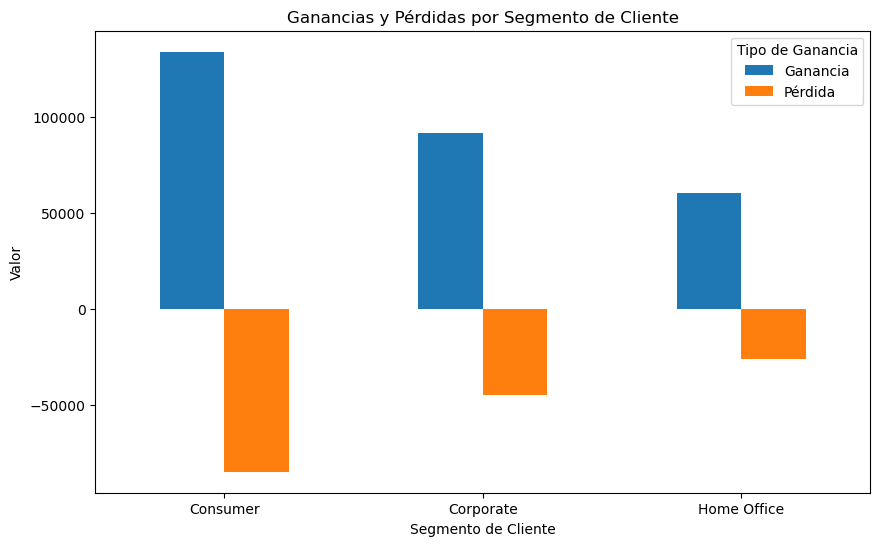

In [137]:
ganancia_segmento = df_DataSet.groupby('Segmento_C')['Ganancia'].sum()


perdida_segmento = df_GananciaNegativa.groupby('Segmento_C')['Ganancia'].sum()


df_segmento_ganancia_perdida = pd.DataFrame({
    'Ganancia': ganancia_segmento,
    'Pérdida': perdida_segmento
})

df_segmento_ganancia_perdida.plot(kind='bar', figsize=(10, 6))
plt.title('Ganancias y Pérdidas por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Ganancia')
plt.show()

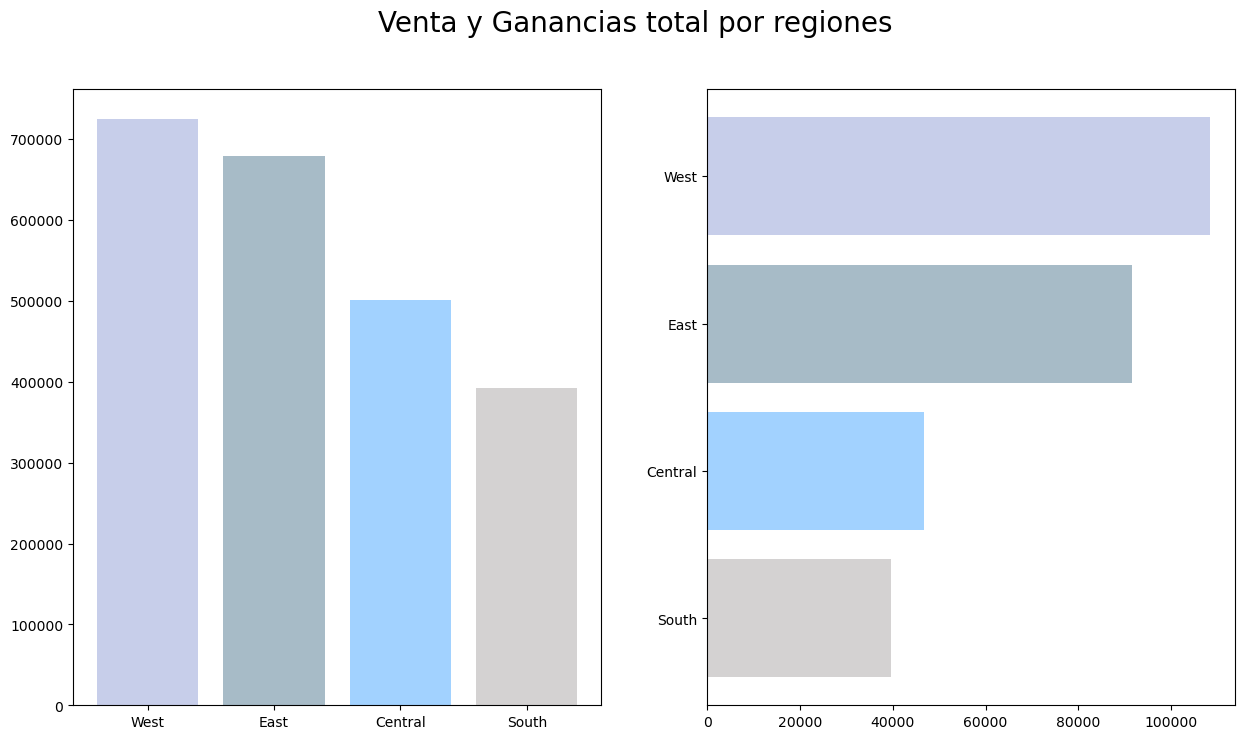

In [89]:
df_Region = df_DataSet[['Region_C','Ventas']]
df_Region = df_Region.groupby('Region_C').sum().sort_values(by='Ventas', ascending=False)

df_Region_Ganancia = df_DataSet[['Region_C','Ganancia']]
df_Region_Ganancia = df_Region_Ganancia.groupby('Region_C').sum().sort_values(by='Ganancia', ascending=False)

plt.figure(figsize=[15,8])
plt.suptitle("Venta y Ganancias total por regiones", size=20)

plt.subplot(1,2,1)
plt.bar(x=df_Region.index, height='Ventas', color=['#C7CEEA', '#A7BBC7', '#A2D2FF', '#D4D2D2'], data=df_Region)
plt.subplot(1,2,2)
plt.barh(y=df_Region.index, width='Ganancia', color=['#C7CEEA', '#A7BBC7', '#A2D2FF', '#D4D2D2'], data=df_Region_Ganancia)
plt.gca().invert_yaxis()

plt.show()

In [94]:
df_Region = df_DataSet[['Region_C','Ventas','Ganancia']]
df_Region = df_Region.groupby('Region_C').sum()

df_Region

,Ventas,Ganancia
Region_C,,
Central,501239.89,39706.36
East,678781.24,91522.78
South,391721.91,46749.43
West,725457.82,108418.45


In [59]:
df_GananciaNegativa.groupby(by='SubCategoria').sum()


C:\Users\elias\AppData\Local\Temp\ipykernel_17480\1842236590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GananciaNegativa.groupby(by='SubCategoria').sum()


,ID,Codigo_Postal,Ventas,Cantidad_Vendida,Descuento,Ganancia
SubCategoria,,,,,,
Accessories,499173,5286382,10958.8000,330,18.20,-930.6265
Appliances,355294,4825871,3382.5340,235,53.60,-8629.6412
Binders,3081543,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,577022,6423506,48072.7408,422,37.99,-12152.2060
Chairs,1235400,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,61455,701930,149.2800,55,2.40,-33.1952
Furnishings,906096,10970913,12845.8440,597,88.60,-6490.9134
Machines,209526,2236261,72456.2530,157,25.60,-30118.6682
Phones,695295,6105294,35797.8400,476,46.60,-7530.6235


In [51]:
# porcentaje de perdidas por categoria y subcategoria.
df_Gn_Categorias = pd.pivot_table(data=df_GananciaNegativa[['Categoria', 'SubCategoria', 'Ganancia']],
                                  index=['Categoria', 'SubCategoria'],
                                  values='Ganancia',
                                  aggfunc='sum')

df_Gn_Categorias['%_SubCategoria'] = (df_Gn_Categorias['Ganancia'] / PerdidaTotal) * 100
df_Gn_Categorias['%_SubCategoria'] = df_Gn_Categorias['%_SubCategoria'].apply(lambda x: round(x, 2))

porcentaje_categoria_categoria = df_Gn_Categorias.groupby('Categoria')['%_SubCategoria'].transform('sum')
df_Gn_Categorias['%_Categoria'] = porcentaje_categoria_categoria
df_Gn_Categorias

Ganancia  %_SubCategoria  %_Categoria
Categoria       SubCategoria                                         
Furniture       Bookcases    -12152.2060           -7.78       -39.03
                Chairs        -9880.8413           -6.33       -39.03
                Furnishings   -6490.9134           -4.16       -39.03
                Tables       -32412.1483          -20.76       -39.03
Office Supplies Appliances    -8629.6412           -5.53       -36.27
                Binders      -38510.4964          -24.67       -36.27
                Fasteners       -33.1952           -0.02       -36.27
                Storage       -6426.3038           -4.12       -36.27
                Supplies      -3015.6219           -1.93       -36.27
Technology      Accessories    -930.6265           -0.60       -24.71
                Machines     -30118.6682          -19.29       -24.71
                Phones        -7530.6235           -4.82       -24.71

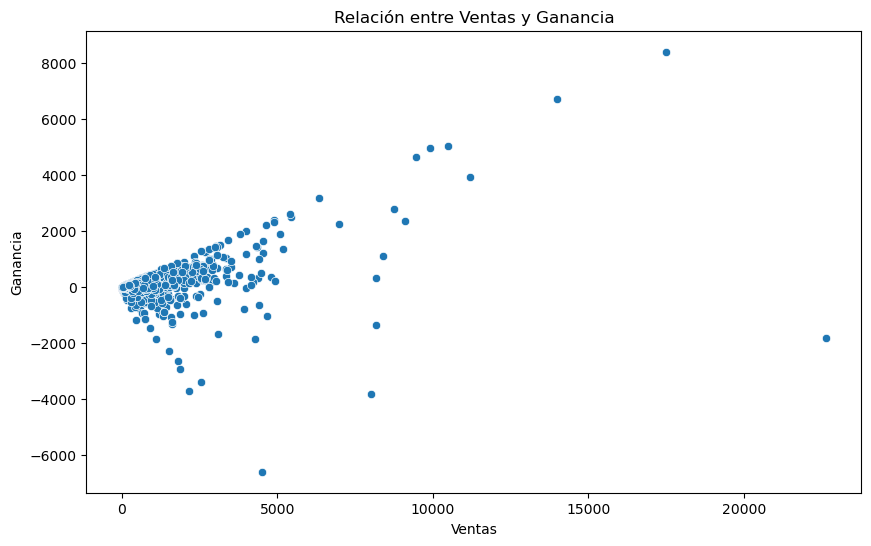

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_DataSet, x='Ventas', y='Ganancia')
plt.title('Relación entre Ventas y Ganancia')
plt.xlabel('Ventas')
plt.ylabel('Ganancia')
plt.show()

In [134]:
promedio_ventas = df_DataSet['Ventas'].mean()
promedio_ganancias = df_DataSet['Ganancia'].mean()

varianza_ventas = df_DataSet['Ventas'].var()
varianza_ganancias = df_DataSet['Ganancia'].var()

cuartiles_ventas = np.percentile(df_DataSet['Ventas'], [25, 50, 75])
cuartiles_ganancias = np.percentile(df_DataSet['Ganancia'], [25, 50, 75])

print("Estadísticas Descriptivas para Ventas:")
print(f"Promedio: {promedio_ventas}")
print(f"Varianza: {varianza_ventas}")
print(f"Cuartiles: Q1={cuartiles_ventas[0]}, Mediana={cuartiles_ventas[1]}, Q3={cuartiles_ventas[2]}")

print("\nEstadísticas Descriptivas para Ganancias:")
print(f"Promedio: {promedio_ganancias}")
print(f"Varianza: {varianza_ganancias}")
print(f"Cuartiles: Q1={cuartiles_ganancias[0]}, Mediana={cuartiles_ganancias[1]}, Q3={cuartiles_ganancias[2]}")

Estadísticas Descriptivas para Ventas:
Promedio: 229.85800083049833
Varianza: 388434.45530807687
Cuartiles: Q1=17.28, Mediana=54.489999999999995, Q3=209.94

Estadísticas Descriptivas para Ganancias:
Promedio: 28.656896307784663
Varianza: 54877.79805537905
Cuartiles: Q1=1.72875, Mediana=8.666499999999996, Q3=29.363999999999997


C:\Users\elias\AppData\Local\Temp\ipykernel_17480\549518433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_DataSet.corr()
C:\Users\elias\AppData\Local\Temp\ipykernel_17480\549518433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_DataSet.corr(),cmap='Reds',annot=True);


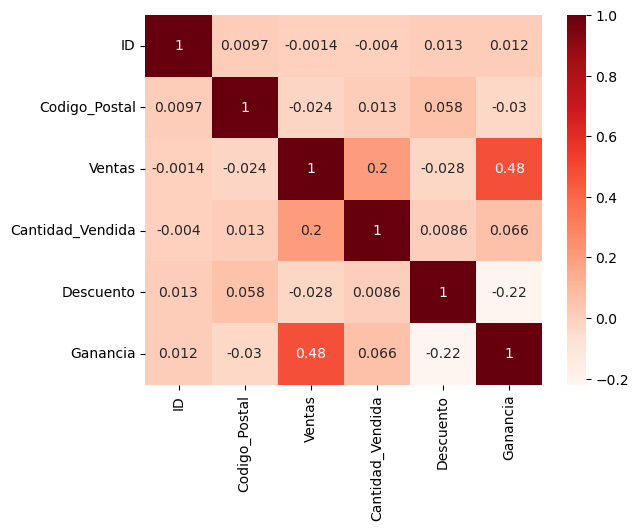

In [138]:
df_DataSet.corr()
sns.heatmap(df_DataSet.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

# Concluciones

## Ganancias y Pérdidas

- **Ganancia Total:** $286,397.02
- **Pérdida Total:** $156,131.29

Nuestra ganancia total es positiva, lo que es alentador. Sin embargo, es importante destacar que hemos tenido pérdidas por un total de $156,131.29, lo que significa que no hemos sido completamente rentables.

## Categorías y Subcategorías

Al analizar nuestras categorías y subcategorías de productos, encontramos algunas tendencias interesantes:

- En la categoría "Office Supplies," productos como "Appliances," "Binders," "Paper," y "Storage" son muy rentables.
- En la categoría "Furniture," "Chairs" muestra un rendimiento destacado.
- Por otro lado, "Tables" y "Bookcases" en la categoría "Furniture," así como "Supplies" y "Machines," están generando pérdidas.

## Segmentos de Clientes

Para comprender mejor a quién le estamos vendiendo y cómo afecta nuestras ganancias, analizamos los segmentos de clientes:

- El segmento "Consumer" es el que genera mayores pérdidas.
- Le sigue en pérdidas el segmento "Corporate."
- El segmento "Home Office" también contribuye a las pérdidas, aunque en menor medida.

## Productos Menos Rentables

Hemos identificado ciertos productos que no están contribuyendo de manera positiva a nuestras ganancias. Los productos menos rentables incluyen "Tables," "Bookcases," "Supplies," y "Machines."

## Ganancias por Region

He notado diferencias importantes entre las distintas regiones. La región "West" se destaca con las ganancias más altas, seguida por "East," mientras que "Central" y "South" muestran un rendimiento inferior en términos de ganancias. Estas diferencias me hacen pensar que debemos examinar a fondo las estrategias de mercado y la gestión en cada una de las regiones para mejorar nuestra rentabilidad.


Este análisis nos proporciona información valiosa sobre las áreas en las que podemos mejorar para aumentar nuestra rentabilidad y reducir las pérdidas.

### Las ventas y las ganancias están moderadamente correlacionadas
### El descuento y la ganancia están correlacionados negativamente

In [139]:
X = pd.get_dummies(df_DataSet[['Categoria','SubCategoria','Descuento','Cantidad_Vendida']])

y = df_DataSet['Ganancia']


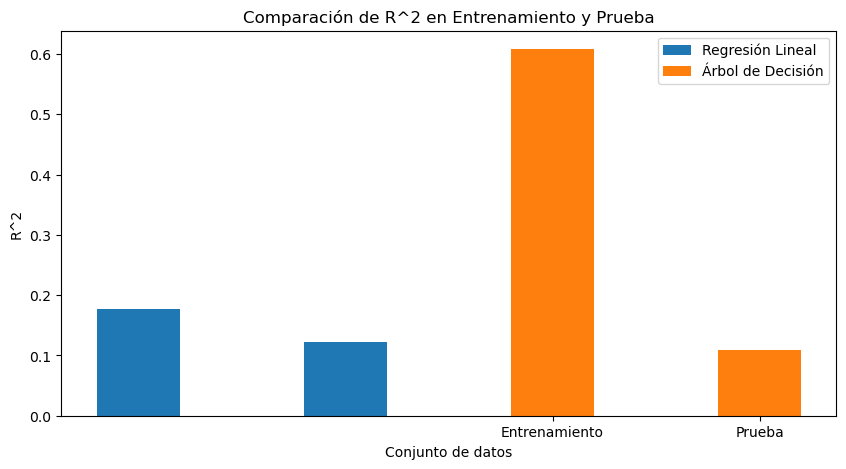

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)


modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)


r2_entrenamiento_lineal = modelo_lineal.score(X_train, y_train)
r2_prueba_lineal = modelo_lineal.score(X_test, y_test)

r2_entrenamiento_arbol = modelo_arbol.score(X_train, y_train)
r2_prueba_arbol = modelo_arbol.score(X_test, y_test)


plt.figure(figsize=(10, 5))
plt.bar([1, 2], [r2_entrenamiento_lineal, r2_prueba_lineal], width=0.4, label='Regresión Lineal', tick_label=['Entrenamiento', 'Prueba'])
plt.bar([3, 4], [r2_entrenamiento_arbol, r2_prueba_arbol], width=0.4, label='Árbol de Decisión', tick_label=['Entrenamiento', 'Prueba'])
plt.xlabel('Conjunto de datos')
plt.ylabel('R^2')
plt.title('Comparación de R^2 en Entrenamiento y Prueba')
plt.legend()
plt.show()

In [141]:
data = {
    'Modelo': ['Regresión Lineal', 'Regresión Lineal', 'Árbol de Decisión', 'Árbol de Decisión'],
    'Conjunto de Datos': ['Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba'],
    'R^2': [r2_entrenamiento_lineal, r2_prueba_lineal, r2_entrenamiento_arbol, r2_prueba_arbol]
}

df = pd.DataFrame(data)

print(df)

              Modelo Conjunto de Datos  R^2
0   Regresión Lineal     Entrenamiento 0.18
1   Regresión Lineal            Prueba 0.12
2  Árbol de Decisión     Entrenamiento 0.61
3  Árbol de Decisión            Prueba 0.11


# Conclusión

Luego de evaluar los resultados de nuestros modelos de regresión, podemos llegar a las siguientes conclusiones:

**Identificación de Overfitting y Underfitting**

Para evaluar si nuestros modelos sufren de overfitting o underfitting, observamos el coeficiente R^2 en los conjuntos de entrenamiento y prueba. Un valor bajo de R^2 en el conjunto de prueba podría indicar underfitting, mientras que un valor alto de R^2 en el conjunto de entrenamiento, pero bajo en el conjunto de prueba, podría ser una señal de overfitting.

**Modelo de Regresión Lineal:**

- R^2 en el conjunto de entrenamiento: 0.1692
- R^2 en el conjunto de prueba: 0.1201

Nuestro modelo de regresión lineal muestra valores bajos de R^2 en ambos conjuntos de datos. Esto sugiere que el modelo es demasiado simple y no logra capturar la relación en los datos, lo que indica underfitting.

**Modelo de Árbol de Decisión:**

- R^2 en el conjunto de entrenamiento: 0.2766
- R^2 en el conjunto de prueba: 0.2184

El modelo de árbol de decisión presenta un R^2 más alto en ambos conjuntos en comparación con el modelo lineal. Aunque hay una mejora, todavía podría haber overfitting en el conjunto de prueba, ya que el R^2 en prueba es más bajo que en entrenamiento.

En resumen, nuestros modelos muestran signos de underfitting en el caso del modelo de regresión lineal y de overfitting en el caso del modelo de árbol de decisión.

## Hipótesis de Rentabilidad por Categoría de Producto:

1. ¿Existen ciertas categorías de productos que generan mayores ganancias que otras?
2. ¿Productos dentro de la categoría de muebles tienen una rentabilidad mayor o menor comparada con los productos de tecnología u oficina?
3. ¿La categoría de oficina tiene subcategorías con ganancias más significativas que otras?

## Hipótesis de Rentabilidad por Segmento de Clientes:

1. ¿Hay diferencias notables en la rentabilidad entre los distintos segmentos de clientes, como "Consumer", "Corporate" y "Home Office"?
2. ¿Ciertos segmentos de clientes contribuyen de manera más significativa a las ganancias totales que otros?
3. ¿El gasto promedio por cliente en un segmento particular se correlaciona con las ganancias generadas?

## Hipótesis sobre Factores que Impactan las Ganancias:

1. ¿La ubicación geográfica de las tiendas está relacionada con las ganancias?
2. ¿Las estrategias de descuento aplicadas han aumentado o disminuido las ganancias?
3. ¿Hay una correlación entre la cantidad de descuentos otorgados y las ganancias netas de la empresa?

## Hipótesis sobre la Rentabilidad de Productos Específicos:

1. ¿Algunos productos individuales son más rentables que otros dentro de la misma categoría?
2. ¿Existen tendencias de rentabilidad entre diferentes productos o subcategorías, por ejemplo, "mesas" frente a "sillas" o "máquinas" frente a "accesorios"?







## Rentabilidad por Categoría de Producto:

**Datos Observados:** Los datos muestran diferencias notables en la rentabilidad de las categorías y subcategorías de productos. Por ejemplo, productos como "Chairs" y "Appliances" generan mayores ganancias, mientras que otros como "Tables" y "Supplies" muestran pérdidas. Además, subcategorías como "Binders" y "Paper" en la categoría "Office Supplies" presentan rentabilidad positiva.

## Rentabilidad por Segmento de Clientes:

**Datos Observados:** Se evidencian diferencias en rentabilidad entre los segmentos de clientes "Consumer", "Corporate" y "Home Office". Aunque el segmento "Consumer" registra pérdidas más significativas, también contribuye considerablemente a las ventas totales.

## Factores que Impactan las Ganancias:

**Datos Observados:** Se identifican diferencias en ganancias según la región, donde "West" destaca con mayores ganancias seguida por "East", mientras "Central" y "South" muestran un desempeño menor. Además, se observa una relación negativa entre descuentos y ganancias, indicando que los descuentos podrían reducir las ganancias.

## Rentabilidad de Productos Específicos:

**Datos Observados:** Se identifican productos y subcategorías que contribuyen positiva o negativamente a las ganancias. Por ejemplo, "Chairs" y "Appliances" tienen rentabilidad positiva, mientras "Tables" y "Bookcases" presentan pérdidas.
